### Basic Analysis and Exploration of Credit One Data

#### Credit one has recently noticed an increase in customer loan default rates. The goal here is to perform initial and basic analysis of the data collected by Credit One inc. & Report initial findings and insights. This is to be done in preparation for indepth investigation for patterns that may affect customer account status and machine learning modeling to predict coustomers that will default in future installments.
#### The Data
#### The available data was made available by Tamkang University, Taiwan. This data includes 30000 records containing customer loan information. The information includes: Credit Limit provided to customer, Gender, Education, Marital status, Age, 6 month payment history, 6 month bill statement amounts, 6 month amount of payment made and Default status

In [4]:
import pandas as pd

## # import our data

In [5]:
credit = pd.read_csv('default of credit card clients.csv', header = 1)

###  Quickly view a sample of the data by using the head() function


In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Study the make up of the data by using the describe() function.
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Check the data type of the features by using the info() function
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
credit.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [10]:
#check for missing values in data set
print(credit.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [11]:
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
# Data cleaning: remove the ID feature from the data set. use head function() to confirm ID has been removed
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# drop ID feature form data frame
credit = credit.drop(['ID'], axis = 1)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
# create a CSV file of our initila data preparation (credit)
credit.to_csv("credit.csv", sep=',')

## Correlation and Covariance Matrix


In [15]:
# Looking at correlation using basic correlation Matrix in pandas
corrMat = credit.corr() 
print (corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

## import addtional modules needed for visualization

In [16]:
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

## Correlation estimation by heat map using matplotlib

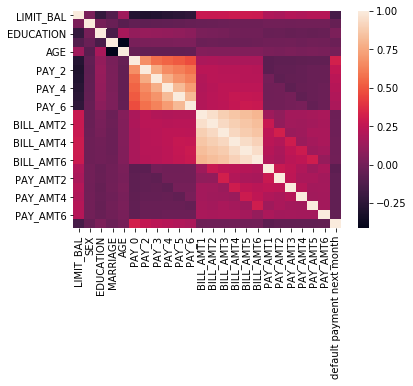

In [17]:
sns.heatmap(corrMat)

### The correlation plot above suffgests that there is little correlation with defaulting a payment next month. The higest correlation is found with the payment history attributes(pay0-pay6).These track the weather a payment was made during the last 6 months.

In [18]:
#Looking at covariance matrix using covariance matrix in pandas
covMat = credit.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

## Covariance Estimation by heatmap using matplotlib

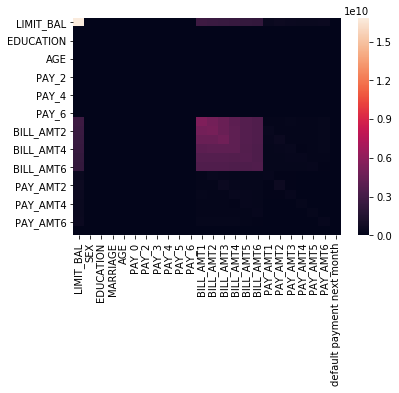

In [19]:
sns.heatmap(covMat)

### The covariance plot above suggests that no covarience exists with defaulting a payment next month. However, as one would expect covaricence exists with in the billilng amount.

## Visualizing the data
### Histograms

In [20]:
# use the index object in pandas to make sure we know the column names in the
#dataframe
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### Use matplotlib to create histograms

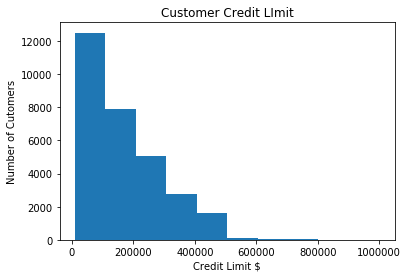

In [21]:
# create histogram of Limit Balance and tittle
plt.hist(credit['LIMIT_BAL'])
plt.title("Customer Credit LImit")
plt.xlabel("Credit Limit $")
plt.ylabel("Number of Cutomers")
plt.show()

### Histogram of credit limit vs number of customers: the histogram clearly show the higher number of custmers fall with in the credit limint range of 25,000 - 300,000 dollars.

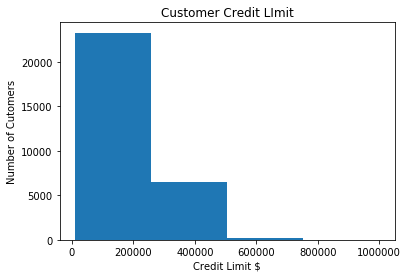

In [22]:
#Limit the number of bins by using bins=x
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.title("Customer Credit LImit")
plt.xlabel("Credit Limit $")
plt.ylabel("Number of Cutomers")
plt.show()

### Histogram of credit limit vs number of customers: the histogram clearly show the higher number of custmers fall with in the credit limint range of 25,000 - 300,000 dollars.

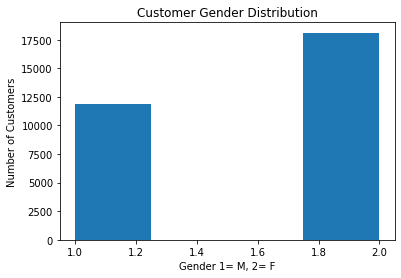

In [23]:
# create a histogram describing the customer gender distribution
plt.hist(credit['SEX'],bins=4)
plt.title("Customer Gender Distribution")
plt.xlabel("Gender 1= M, 2= F")
plt.ylabel("Number of Customers")
plt.show()


### Histogram showing the gender distribution in the data set. It is evident that the majority of the customers are female.

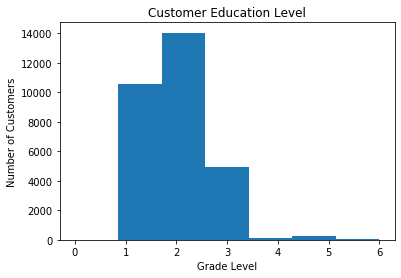

In [24]:
# create histogram describing the customers education level distribution
plt.hist(credit['EDUCATION'], bins=7)
plt.title("Customer Education Level")
plt.xlabel("Grade Level")
plt.ylabel("Number of Customers")
plt.show()

### Histogram showing the distribution of the customer education level. The majority of the customers fall with in the college  and graduate school  education level.Legend: 1= graduate school, 2= college, 3 = highschool, 0,4,5,&6 = other.

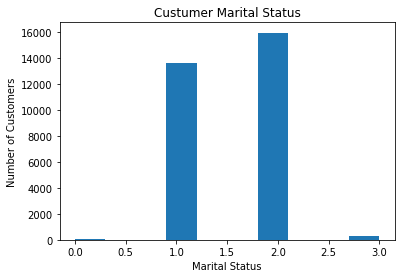

In [25]:
#Create a histogram describing the customers' Marital status
plt.hist(credit['MARRIAGE'])
plt.title("Custumer Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()

### Histogram showing the distribution of customer marrital status. Legend: 0=other, 1=married, 2=single, 3= divorced.

#### Legend: 0=others, 1 = Married, 2 = single, 3 = divorced

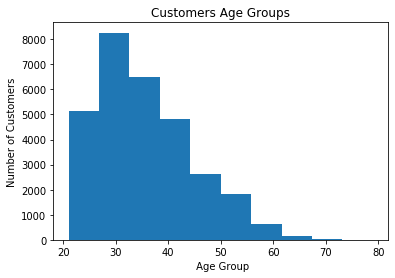

In [26]:
# create a histogram describing the customers age by groups
plt.hist(credit['AGE'], bins = 10)
plt.title('Customers Age Groups')
plt.xlabel(' Age Group')
plt.ylabel('Number of Customers')
plt.show()

### Histogram showing the distribution of cutomer age by groups. it is evident that the peak number of customers are within the ages of 25 - 40 years old.

## Create Line plots using matplotlib
### Line plots are used to illustrate the range of a numerical variable. They can be applied to a single variable or multiple variables(multivariate plot).

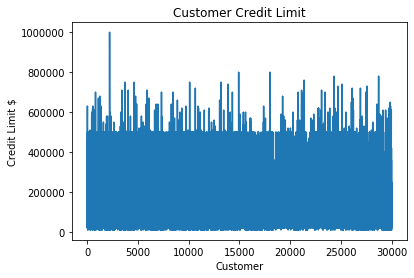

In [27]:
# create a line plot to describe the LIMIT_Bal varialble
plt.plot(credit['LIMIT_BAL'])
plt.title("Customer Credit Limit")
plt.xlabel("Customer")
plt.ylabel("Credit Limit $")
plt.show()

### Line plot showing the credit limit of each customer by number.

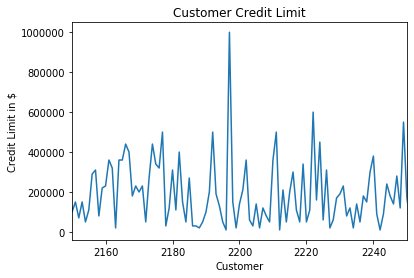

In [28]:
plt.plot(credit['LIMIT_BAL'])
plt.xlim(2150, 2250)
plt.title ("Customer Credit Limit")
plt.xlabel( "Customer")
plt.ylabel("Credit Limit in $")
plt.show()

### Line plot showing the customers credit limit by customer number. Here the plot was focused on the 100 customers between 2150 and 2250.

## Use scatter plots in matplotlib for comparison between feature.

### This type of plot is usefull to understanding relationships between features.

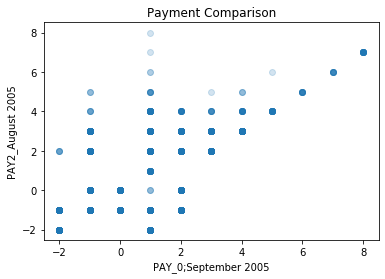

In [29]:
# create a scatter plot comparing payment history in September and August of 2005. variables 
# PAY_0 = September, PAY_2 = August.

# first set the x and y variables equal to respective features.
x= credit['PAY_0']
y= credit['PAY_2']


# next apply matplot lib to create the scatter plot using the x and y varibles and labels
plt.scatter(x,y, alpha=0.2)
plt.title("Payment Comparison")
plt.xlabel("PAY_0;September 2005")
plt.ylabel("PAY2_August 2005")
plt.show()

### Scatter plot comparing the number of missed payments in August and September 2005.

## Use Box Plot to undestand where the bulk of the data is in any given feature.

In [30]:
# create a box plot using matplotlib. look at the column names first
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


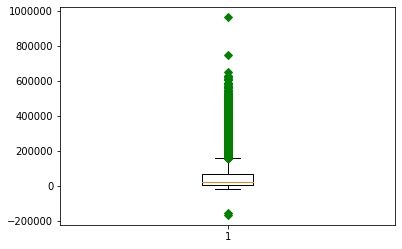

In [31]:
# create a box plot using one of the features
A=credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

### Box plot showing the amount Billed in September 2005

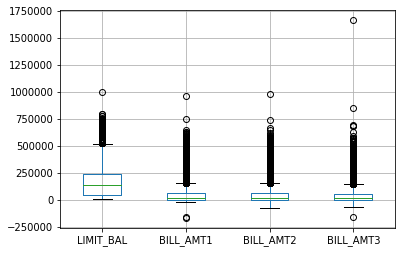

In [32]:
# create a box plot using multiple features
credit[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].boxplot()
plt.show()

### Box plot showing the customer credit limit and amount billed in three sequential months. Legend: BILL_AMT1= Sept, BILL_AMT2=August, BILL_AMT3=July of 2005.

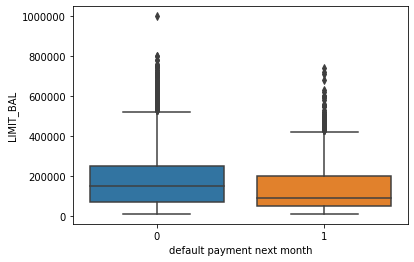

In [34]:
#create boxplots looking at two variables at once
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=credit)

### Box Plot showing the customers credit limin vs the default payment the following month. Legend: 0= no default, 1= default.

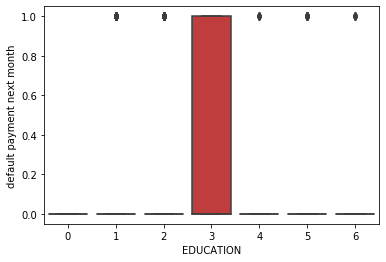

In [35]:
sns.boxplot(x='EDUCATION', y='default payment next month', data=credit)

### Boxplot showing the default payment status in the following month vs the cutomer education level. The plot suggests that the majority of missed payments originate from the highshool graduate group. Legend: 0, 4,5,6 =other, 1= graduate school, 2= university, 3= highschool.

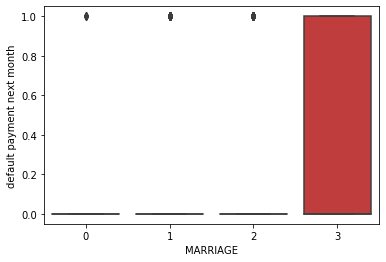

In [36]:
sns.boxplot(x='MARRIAGE', y='default payment next month', data=credit)

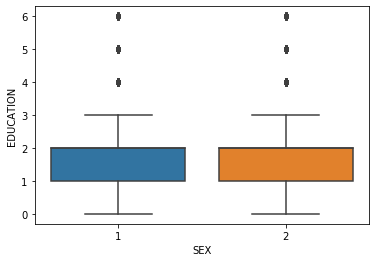

In [37]:
sns.boxplot(x='SEX', y='EDUCATION', data=credit)

### Box plot showing the customer education level and gender. it appears that the mjority of the customers fall with in the graduate school and universtiy levels. 